In [1]:
import pandas as pd

data = pd.read_excel("C:/Users/oosedus/Desktop/3-2/Business Analytics/Project/Project/BirthratePrediction/Data/after_extration_data.xlsx")
data = pd.DataFrame(data)

In [2]:
data

,Year,ID,Country Name,BirthRate,FemaleLaborParticipationRate,AvgHoursWorked,FirstBirthAge,MarriageRate,EmploymentRate,UnemploymentRate,...,GNI,EduExpenditureOfGDP,WeeksPaidLeaveForMothers,TotalLaborParticipationRate,DivorceRate,InflationRate,Population,WorkLeisureBalanceIndex,LaborMarketStability,MarriageStabilityIndex
0,1990,AUT1990,Austria,11.8,55.172,1652.679,27.2,5.9,53.930,3.958333,...,19561.545708,4.957250,60.0,67.429,2.1,3.261872,7677850.0,24.509914,13.624422,2.809524
1,1991,AUT1991,Austria,12.2,55.979,1652.679,27.2,5.7,53.930,3.958333,...,20602.091660,5.103220,112.0,67.959,2.1,3.337426,7754891.0,24.318766,13.624422,2.714286
2,1992,AUT1992,Austria,12.2,57.604,1652.679,27.3,5.8,54.558,3.958333,...,21345.923456,5.296980,112.0,68.839,2.1,4.020847,7840709.0,24.007888,13.783075,2.761905
3,1993,AUT1993,Austria,12.0,58.208,1652.679,27.3,5.7,54.281,3.958333,...,21793.075303,5.252000,112.0,68.986,2.1,3.631786,7905632.0,23.956730,13.713096,2.714286
4,1994,AUT1994,Austria,11.6,61.895,1652.679,27.5,5.5,56.969,4.241667,...,22677.856984,5.340175,112.0,71.342,2.1,2.953407,7936118.0,23.165583,13.430804,2.619048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,2017,PRT2017,Portugal,8.4,71.674,1727.140,31.2,3.3,53.712,9.225000,...,32269.025353,5.015610,30.1,74.690,2.1,1.368614,10340124.0,23.124113,5.822439,1.571429
476,2018,PRT2018,Portugal,8.5,72.376,1737.704,31.4,3.3,54.978,7.166667,...,34075.601394,4.675160,30.1,75.145,2.0,0.993716,10334633.0,23.124679,7.671348,1.650000
477,2019,PRT2019,Portugal,8.4,72.901,1743.930,31.4,3.3,55.422,6.675000,...,36330.275280,4.630020,30.1,75.523,2.0,0.338178,10354445.5,23.091376,8.302921,1.650000
478,2020,PRT2020,Portugal,8.2,71.790,1611.193,31.6,3.3,54.056,7.116667,...,34411.605571,4.876560,30.1,74.227,1.7,-0.012438,10384846.0,21.706293,7.595691,1.941176


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year                          480 non-null    int64  
 1   ID                            480 non-null    object 
 2   Country Name                  480 non-null    object 
 3   BirthRate                     480 non-null    float64
 4   FemaleLaborParticipationRate  480 non-null    float64
 5   AvgHoursWorked                480 non-null    float64
 6   FirstBirthAge                 480 non-null    float64
 7   MarriageRate                  480 non-null    float64
 8   EmploymentRate                480 non-null    float64
 9   UnemploymentRate              480 non-null    float64
 10  HousingPrice                  480 non-null    float64
 11  InterestRate                  480 non-null    float64
 12  PartTimeRate                  480 non-null    float64
 13  Famil

C:\Users\oosedus\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


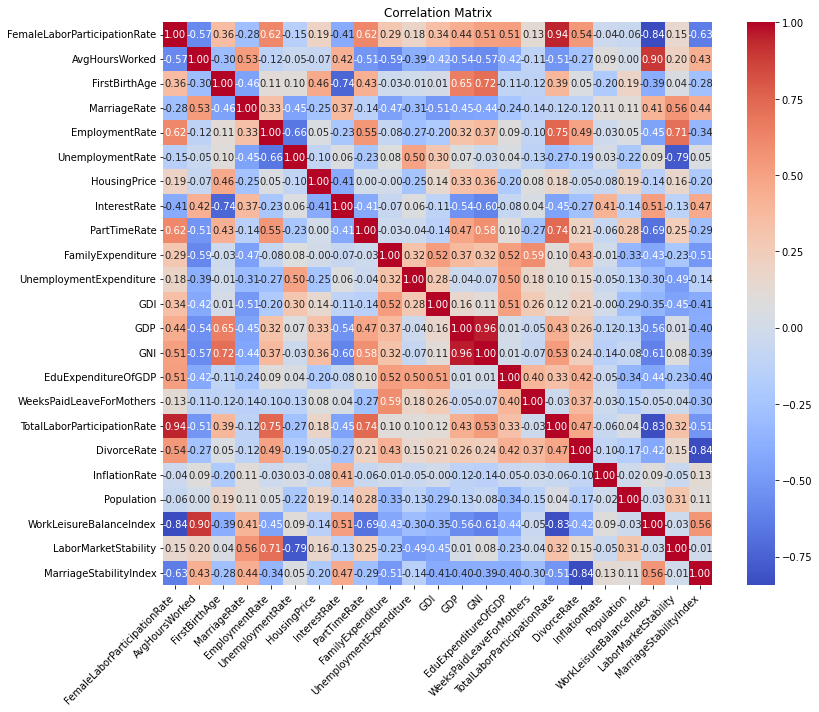

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

columns_to_exclude = ['Year', 'Country Name', 'ID', 'BirthRate']
df_analysis = data.drop(columns=columns_to_exclude)

corr_matrix = df_analysis.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            xticklabels=corr_matrix.columns,
            yticklabels=corr_matrix.columns)
plt.title('Correlation Matrix')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np


# 예측을 위해 'Year', 'Country Name', 'ID', 'BirthRate'를 제외한 특성을 사용합니다.
features = data.drop(columns=['Year', 'Country Name', 'ID', 'BirthRate'])

# 'BirthRate'는 타겟 변수입니다.
target = data['BirthRate']

# 특성 스케일링
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# 데이터를 훈련 세트와 테스트 세트로 분할합니다.
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델을 초기화하고 피팅합니다.
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 특성 중요도를 출력합니다.
feature_importances = rf.feature_importances_
important_features = pd.Series(feature_importances, index=features.columns).sort_values(ascending=False)
print("Feature importances from Random Forest:\n", important_features)

# Lasso 회귀 모델로 특성 선택과 교차 검증을 수행합니다.
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_train, y_train)

# 중요한 특성만 선택합니다.
lasso_coefs = pd.Series(lasso.coef_, index=features.columns)
important_features_lasso = lasso_coefs[lasso_coefs != 0].sort_values(ascending=False)
print("Selected features from Lasso:\n", important_features_lasso)

# 테스트 세트에서 예측을 수행하고 RMSE를 계산합니다.
predictions = rf.predict(X_test)
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f"Test RMSE: {rmse}")

# 랜덤 포레스트 모델의 교차 검증 점수를 계산합니다.
cv_scores = cross_val_score(rf, features_scaled, target, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)
print(f"Cross-validated RMSE: {cv_rmse.mean()}")



Feature importances from Random Forest:
 HousingPrice                    0.224460
FirstBirthAge                   0.139724
EmploymentRate                  0.092929
UnemploymentExpenditure         0.075701
Population                      0.064890
WeeksPaidLeaveForMothers        0.056325
GDI                             0.051576
FamilyExpenditure               0.048789
MarriageRate                    0.045341
EduExpenditureOfGDP             0.036845
FemaleLaborParticipationRate    0.017383
GDP                             0.017229
TotalLaborParticipationRate     0.016709
GNI                             0.016359
LaborMarketStability            0.013998
InterestRate                    0.012637
WorkLeisureBalanceIndex         0.012202
PartTimeRate                    0.012182
AvgHoursWorked                  0.011788
MarriageStabilityIndex          0.010803
InflationRate                   0.008752
DivorceRate                     0.007256
UnemploymentRate                0.006123
dtype: float64
S

In [6]:
# 예측값과 실제값을 데이터프레임으로 만듭니다.
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

# 예측값과 실제값의 비교를 보기 위해 데이터프레임을 출력합니다.
predictions_df.tail(60)


,Actual,Predicted
302,9.8,9.552
173,10.9,11.156
471,7.9,9.222
18,9.3,9.664
332,9.2,9.144
185,10.1,10.026
90,10.5,10.172
220,11.3,11.240
39,11.7,11.853
323,9.6,10.547


In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import RidgeCV

# 특성과 타겟은 앞서 정의한 대로 사용합니다.

# 데이터 전처리 개선: 예시로 결측치 제거
# df.dropna(inplace=True)

# 하이퍼파라미터 튜닝을 위한 그리드 서치
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터를 가진 모델 사용
best_rf = grid_search.best_estimator_

# 추가 모델 정의
gbr = GradientBoostingRegressor(n_estimators=200, random_state=42)
ridge = RidgeCV(cv=5)

# 스태킹 앙상블 모델 구성
estimators = [
    ('rf', best_rf),
    ('gbr', gbr),
    ('ridge', ridge)
]

stacking_regressor = StackingRegressor(estimators=estimators, final_estimator=RidgeCV())

# 스태킹 모델 훈련
stacking_regressor.fit(X_train, y_train)

# 스태킹 모델의 성능 평가
stacked_predictions = stacking_regressor.predict(X_test)
stacked_rmse = mean_squared_error(y_test, stacked_predictions, squared=False)
print(f"Stacked Test RMSE: {stacked_rmse}")

# 스태킹 모델의 교차 검증
stacked_cv_scores = cross_val_score(stacking_regressor, features_scaled, target, cv=5, scoring='neg_mean_squared_error')
stacked_cv_rmse = np.sqrt(-stacked_cv_scores)
print(f"Stacked Cross-validated RMSE: {stacked_cv_rmse.mean()}")


Stacked Test RMSE: 0.4168963002055045
Stacked Cross-validated RMSE: 1.7139450165135446
